In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/train.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/train'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")

Folders moved successfully!


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/test (1).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/test'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")


Folders moved successfully!


In [28]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.resnet import ResNet50

In [30]:
conv_base = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [31]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.build(input_shape=(None,150, 150, 3))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,696,453 (139.99 MB)

 Trainable params: 36,643,333 (139.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [33]:
conv_base.trainable = False

In [52]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

Found 28101 files belonging to 5 classes.
Found 7025 files belonging to 5 classes.


In [35]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - accuracy: 0.7022 - loss: 1.1894 - val_accuracy: 0.7341 - val_loss: 0.9108
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - accuracy: 0.7372 - loss: 0.8911 - val_accuracy: 0.7341 - val_loss: 0.8824
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.7375 - loss: 0.8678 - val_accuracy: 0.7341 - val_loss: 0.8773
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.7376 - loss: 0.8645 - val_accuracy: 0.7341 - val_loss: 0.8694
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.7380 - loss: 0.8624 - val_accuracy: 0.7341 - val_loss: 0.8673
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.7377 - loss: 0.8632 - val_accuracy: 0.7341 - val_loss: 0.8722
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.7370 - loss: 0.8637 - val_accuracy: 0.7341 - val_loss: 0.8660
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.7378 - loss: 0.8628 - 

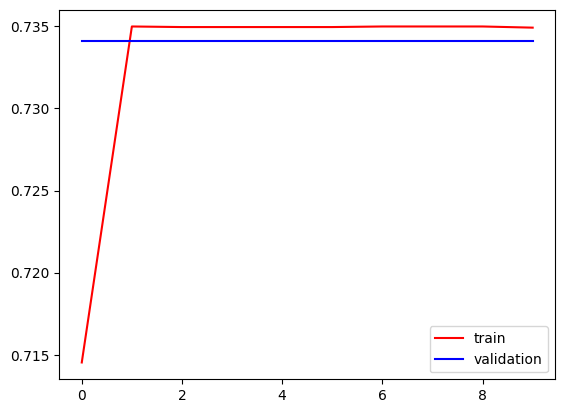

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

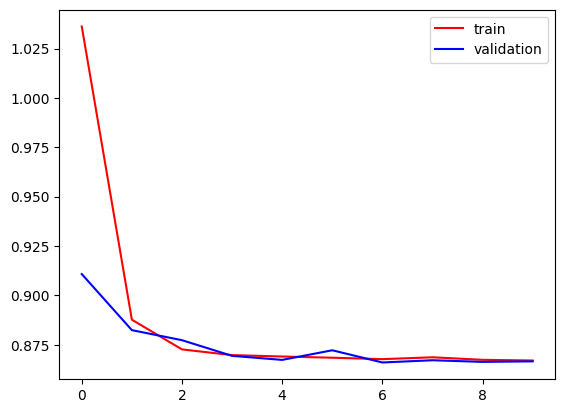

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

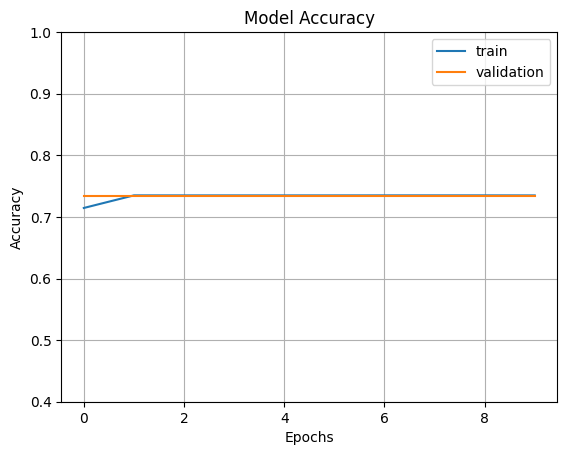

In [40]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

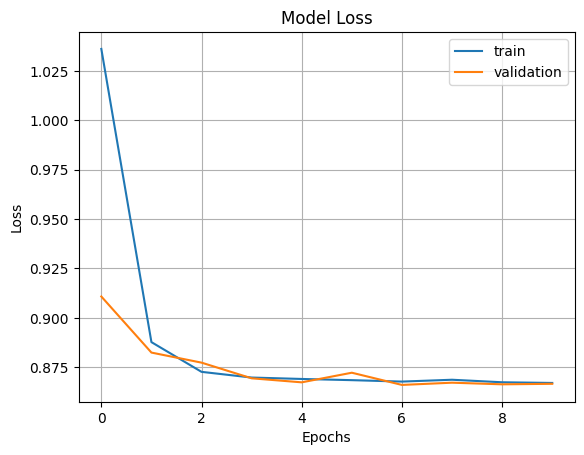

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [42]:
#model evaluation on training set
train_loss,train_accuracy = model.evaluate(train_ds)

879/879 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.7379 - loss: 0.8572


In [43]:
print("Training Accuracy :",train_accuracy)
print("Training Loss :",train_loss)

Training Accuracy : 0.7349560260772705
Training Loss : 0.8628159165382385


In [44]:
#model evaluation on validation set
train_loss,train_accuracy = model.evaluate(validation_ds)

220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7382 - loss: 0.8537


In [45]:
print("Validation Accuracy :",train_accuracy)
print("Validation Loss :",train_loss)

Validation Accuracy : 0.7340925335884094
Validation Loss : 0.8665837049484253


In [46]:
#saving model
model.save('/content/model.h5')

In [47]:
model.save('/content/model.keras')

In [48]:
history.history

{'accuracy': [0.7145297527313232,
  0.7349916100502014,
  0.7349560260772705,
  0.7349560260772705,
  0.7349560260772705,
  0.7349560260772705,
  0.7349916100502014,
  0.7349916100502014,
  0.7349916100502014,
  0.7349204421043396],
 'loss': [1.0361889600753784,
  0.887691855430603,
  0.8726382851600647,
  0.8697502017021179,
  0.8690360188484192,
  0.8684281706809998,
  0.867705762386322,
  0.8686392307281494,
  0.8673607707023621,
  0.8670149445533752],
 'val_accuracy': [0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094,
  0.7340925335884094],
 'val_loss': [0.9107988476753235,
  0.8823988437652588,
  0.8773002624511719,
  0.8693674206733704,
  0.8673250079154968,
  0.8721967339515686,
  0.8660162687301636,
  0.8671462535858154,
  0.8663188815116882,
  0.8665832877159119]}

In [49]:
#recording history in json
import json
with open('history.json', 'w') as f:
    json.dump(history.history, f)

In [54]:
# Print class names
class_names = train_ds.class_names
print("Class names in training set:", train_ds.class_names)
print("Class names in validation set:", validation_ds.class_names)

Class names in training set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Class names in validation set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [55]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

Found 7025 files belonging to 5 classes.


In [56]:
Pred = model.predict(test_ds)
Pred,Pred.shape

220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step


(array([[9.7460885e-13, 9.4360945e-13, 1.0000000e+00, 4.1825886e-24,
         5.6687966e-13],
        [2.2689086e-09, 2.9391317e-10, 1.0000000e+00, 2.2628433e-18,
         5.1235731e-11],
        [7.2729183e-09, 2.9170856e-06, 9.9999702e-01, 3.6823360e-16,
         1.7194961e-11],
        ...,
        [8.5505215e-15, 1.9272335e-12, 1.0000000e+00, 2.4527053e-27,
         2.5116654e-19],
        [1.1495883e-12, 1.9926505e-09, 1.0000000e+00, 1.5502603e-23,
         7.3831316e-17],
        [1.1825129e-09, 1.0145803e-07, 9.9999988e-01, 4.0966802e-19,
         2.8147433e-13]], dtype=float32),
 (7025, 5))

In [57]:
predicated_classes = tf.argmax(Pred, axis=1)
predicated_classes

<tf.Tensor: shape=(7025,), dtype=int64, numpy=array([2, 2, 2, ..., 2, 2, 2])>

In [58]:
true_classes = tf.concat([y for x, y in test_ds], axis=0)
true_classes

<tf.Tensor: shape=(7025, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [59]:
Y_true = tf.argmax(true_classes, axis=1)
Y_true


<tf.Tensor: shape=(7025,), dtype=int64, numpy=array([2, 2, 2, ..., 1, 2, 3])>

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(classification_report(Y_true, predicated_classes,target_names=class_names))

                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00       485
      Moderate       0.00      0.00      0.00      1068
         No_DR       0.73      1.00      0.85      5157
Proliferate_DR       0.00      0.00      0.00       126
        Severe       0.00      0.00      0.00       189

      accuracy                           0.73      7025
     macro avg       0.15      0.20      0.17      7025
  weighted avg       0.54      0.73      0.62      7025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1, 150, 150, 3)


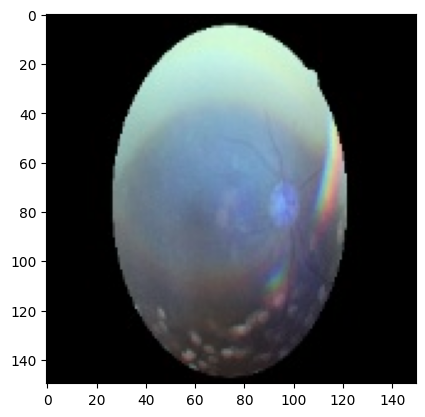

In [62]:
import cv2
image=cv2.imread('/content/image_0_14.jpg')
image_resized= cv2.resize(image, (150,150))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
plt.imshow(image[0])

In [63]:
pred=model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
[[6.9886897e-13 4.2631324e-12 1.0000000e+00 4.4250304e-24 1.8270448e-14]]


In [64]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is No_DR
